# Metody Numeryczne

## Rozwiązywanie równań różniczkowych



### dr hab. inż. Jerzy Baranowski, Prof.AGH

## Isaac Newton

*Data aequatione quodcunque fluentes quantitiae involvente fluxiones invenire et vice versa* 24 października 1676

Rozwiązywanie równań różniczkowych jest rzeczą pożyteczną

## Równania różniczkowe
Równanie różniczkowe
$$ 
\dot{x}=f(t,x)
$$
Rozwiązanie równania różniczkowego $x(t)$ to funkcja, która dla każdego $t$ spełnia
$$ 
\dot{x(t)}=f(t,x(t))
$$

## Problem Cauchy'ego

Wyznaczyć rozwiązanie równania dla $t\geq t_0$ przy czym
$$
x(t_0)=x_0
$$

Inaczej problem początkowy.

Wymiennie będziemy mówić o rozwiązywaniu i całkowaniu równań różniczkowych

## Metoda Eulera

**Istitutiones Calculi Integralis I** 1768

$$ 
\dot{x}=f(t,x),\quad x(t_0)=x_0, \quad x(T)=?
$$

W zależności od tego ile razy $f$ jest różniczkowalne możemy rozwinąć $x(t)$ w szereg Taylora. 
W szczególności
$$
x(t_0+\Delta t)=x_0+\Delta t\cdot f(t_0,x_0)+ \frac{\Delta t^2}{2}(f_t+f_x f)(t_0,x_0)+...
$$



## Metoda Eulera cd..
Podzielmy przedział $T$ na elementy (tzw. kroki)
$$
t_0,\ t_1,\ \ldots,\ t_{n-1},\ t_n
$$
i rozwiązanie w każdym podprzedziale zastępujemy pierwszym wyrazem szeregu Taylora
$$
\begin{aligned}
x_1-x_0={}&(t_1-t_0)f(t_0,x_0)\\
x_2-x_1={}&(t_2-t_1)f(t_1,x_1)\\
{}&\vdots\\
x_n-x_{n-1}={}&(t_n-t_{n-1})f(t_{n-1},x_{n-1})
\end{aligned}
$$
Oznaczając $h_i=t_{i+1}-t_i$ mamy rekurencję
$$
x_{k+1}=x_k + h_k f(t_k,x_k)
$$


## Metoda Eulera cd..
Niech $f (t, x)$ będzie ciągła, $|f|\leq A$  oraz $f$ spełnia warunek Lipshitza na zbiorze
$$
D=\left\{(t,x)\colon t_0 \leq t\leq T, |x−x0|\leq b \right\}
$$
Jeżeli $X − x_0 \leq b/A$ , mamy:

1. Dla $|\max_i h_i|\rightarrow0$ rozwiązanie rekurencuyjne zmierza do ciągłej funckji $ \phi(t)$.
2. $ \phi(t)$ jest ciągłym różniczkowalnym rozwiązaniem równania różniczkowego dla $t_0 \leq t\leq T$. 
3. Nie iestnieją inne rozwiązania równania na przedziale $t_0 \leq t\leq T$.

## Metoda Eulera cd..
Jeżeli w otoczeniu rozwiązania 
$$
f|\leq A,\quad \left|\frac{\partial f}{\partial x}\right|\leq L,\quad \left|\frac{\partial f}{\partial t}\right|\leq M
$$
Zachodzi oszacowanie
$$
\mathrm{error}(t)\leq\frac{M+AL}{L}\left(\mathrm{e}^{L(t-t_0)}-1\right)\cdot|h|
$$
przy założeniu dostatecznie małego $|h|$

## Konsekwencje
1. Błąd z kroku na krok jest rzędu $h$ (bo zgadza się szereg Taylora)
2. Metoda jest zbieżna do rozwiązania.
3. Błąd globalny (na całym przedziale) jest zależny od długości kroku i długości przedziału

Własności te przenoszą się też na bardziej skomplikowane metody.

## Jak to działa

Pierwszy problem testowy to układ równań liniowych:

$$
\dot{x}=\begin{bmatrix}0&1\\-1&0\end{bmatrix}x,\quad x_0=\begin{bmatrix}0\\1\end{bmatrix}
$$

który ma rozwiązanie analityczne
$$
x^*(t)=\begin{bmatrix}\sin(t)\\\cos(t)\end{bmatrix}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

test1=lambda t,x: np.array([x[1],-x[0]])

## Implementacja metody Eulera

In [2]:
def euler(f, x0,t0,tk,n):
    
    h=(tk-t0)/n
    x=np.empty((x0.size,n+1))
    x[:,0]=x0[:]
    for i in range(0,n):
        x[:,i+1]=x[:,i]+h*f(i*h,x[:,i])
    t=np.linspace(t0,tk,n+1)
    return (t,x.transpose())

## Przykładowe rozwiązania

In [3]:
x0=np.array([0,1])
t0=0
tk=np.pi/2
n=50
(t,x)=euler(test1,x0,t0,tk,n)

In [4]:
plt.ioff()

plt.plot(t,x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.gca().legend(('$x^{(1)}$','$x^{(2)}$'),loc=7)
plt.grid()



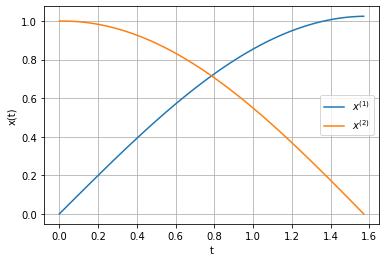

h=0.031415926535897934


In [5]:
plt.show()
print('h='+str((tk-t0)/n))

## Systematyczna ewaluacja
Do oceny jakości metody badamy jak zmienia się błąds w funkcji liczby wywołań prawej strony równania.

In [6]:
errors=[]
evals=[]
for k in range(1,7):
    _,x=euler(test1,x0,t0,tk,10**k)
    errors.append(np.linalg.norm(x[-1,:]-np.array([[1,0]])))
    evals.append(10**k)


In [7]:
plt.loglog(evals,errors,
           marker='s',ms=8,fillstyle='none',
           linestyle='')
plt.xlabel('Liczba wywołań prawej strony')
plt.ylabel('$\|x(t_k)-x^*(t_k)\|$')
plt.grid()

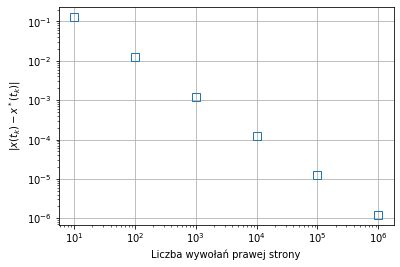

In [8]:
plt.show()

## Konkluzja metody Eulera

Metoda jest bardzo prosta, ale nie nadaje się do dokładnych obliczeń. 

Milion kroków na odcinku $\approx 1.5$s daje błąd (względny i bezwzględny) na poziomie jedynie $10^{-6}$.

## Wstęp do metod Rungego-Kutty

Oczywistym jest potrzeba poszukiwania metod rozwiązania o większej dokładności. Metoda Eulera wywodzi się z całkowania, można by zastosować inne kwadratury.

Całka na odcinku $[t_0,t_k]$ jest przecież rozwiązaniem równania różniczkowego:
$$
\dot{x}=g(t),\quad x(t_0)=x_0
$$
czyli 
$$
x(t_k)=x_0+\int_{t_0}^{t_k}g(t)\mathrm{d} t
$$

Prostym pomysłem jest tzw. **metoda punktu środkowego**, określająca kwadraturę

$$
\begin{aligned}
x(t_0+h)\approx {}&x_1 = x_0 + h g\left(t_0+\frac{h}{2}\right)\\
x(t_1+h)\approx {}&x_2 = x_1 + h g\left(t_1+\frac{h}{2}\right)\\
\vdots{}&\\
x(t_k)\approx {}&x_k = x_{k-1} + h g\left(t_{k-1}+\frac{h}{2}\right)
\end{aligned}
$$
Przy czym można wykazać, że błąd tej kwadratury jest mniejszy niż $C h^2$.

## Postać dla równania różniczkowego

Runge (1895) zaproponował przeniesienie metody na  równania różniczkowe zwyczajne:

$$
x(t_0+h)=x_0+h f
\left(
    t_0+\frac{h}{2},
    x
        \left(
            t_0+\frac{h}{2}
        \right)
    \right)
$$
Ale skąd wziąć wartość $x\left(t_0+\frac{h}{2}\right)$?

## Obliczenia etapowe
Propozycja Rungego, to wykonanie jednego małego kroku metody Eulera z krokiem $h/2$:
$$
    \begin{aligned}
        k_1={}&f(t_0,x_0)\\
        k_2={}&f
            \left(
                t_0+\frac{h}{2},
                x_0+\frac{h}{2}k_1
            \right)\\
        x_1={}&x_0+h k_2
    \end{aligned}
$$

## Dlaczego ma być lepiej?

Czy dodanie kroku w połowie nie będzie po prostu skróceniem kroku?

Porównajmy rozwinięcia Taylora względem $h$:
- Rozwiązanie dokładne
$$
\begin{aligned}
x(t_0+h)={}&x_0+h f(t_0,x_0)+\frac{h^2}{2}(f_t+f_x f)(t_0,x_0)+\\
        +{}&\frac{h^3}{6}(f_{tt}+2f_{tx}f+ f_{xx} f^2 +f_{x}f_{t}+f^2_x f)(t_0,x_0)+\ldots
\end{aligned}
$$

- Rozwiązanie przybliżone
$$
\begin{aligned}
x_1={}&x_0+h f
            \left(
                t_0+\frac{h}{2},
                x_0+\frac{h}{2}f_0
            \right)=\\
   ={}&x_0+hf(t_0,x_0)+   \frac{h^2}{2}(f_t+f_x f)(t_0,x_0)+\\
        +{}&\frac{h^3}{8}(f_{tt}+2f_{tx}f+ f_{xx} f^2)(t_0,x_0)+\ldots
\end{aligned}
$$

## Różnica między rozwiązaniem dokładnym i przybliżonym
Jak można zauważyć wyrazy rzędów pierwszego i drugiego są takie same:

$$
x(t_0+h)-x_1=\frac{h^3}{24}\left(f_{tt}+2f_{tx}f+ f_{xx} f^2 4(f_{x}f_{t}+f^2_x f)+\ldots
\right)(t_0,x_0)$$
Jeżeli więc wszystkie pochodne cząstkowe $f$ rzędu 2 są ograniczone, to

$$
\|x(t_0+h)-x_1\|\leq K h^3
$$

## Obliczeniowo

In [9]:
def midpoint(f, x0,t0,tk,n):
    
    h=(tk-t0)/n
    x=np.empty((max(x0.size,1),n+1))
    x[:,0]=x0[:]
    for i in range(0,n):
        k_1=f(i*h,x[:,i])
        k_2=f(i*h+h/2,x[:,i]+k_1*h/2)
        x[:,i+1]=x[:,i]+h*k_2
    t=np.linspace(t0,tk,n+1)
    return (t,x.transpose())

In [10]:
errors_mp=[]
evals_mp=[]
for k in range(1,7):
    _,x=midpoint(test1,x0,t0,tk,10**k)
    errors_mp.append(np.linalg.norm(x[-1,:]-np.array([[1,0]])))
    evals_mp.append(2*10**k)

In [11]:
plt.loglog(evals,errors,evals_mp,errors_mp,
           marker='s',ms=8,fillstyle='none',
           linestyle='')
plt.xlabel('Liczba wywołań prawej strony')
plt.ylabel('$\|x(t_k)-x^*(t_k)\|$')
plt.gca().legend(('Euler','Midpoint'),loc=0)
plt.grid()

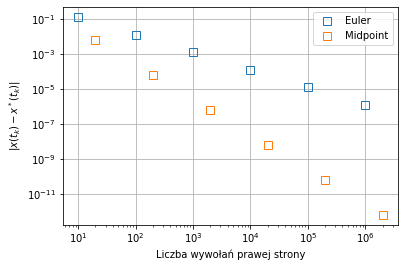

In [12]:
plt.show()

## Metody Rungego-Kutty

Zarówno Runge (1895) i Heun (1900) konstruowali bardziej zaawansowane metody dodając kolejne kroki Eulera. Kutta (1901) sformułował ogólny schemat tego, co nazywamy metodą Rungego-Kutty:

**Definicja** Niech $s$ będzie liczbą całkowitą (liczba etapów), zaś $a_{ij}$, $b_{i}$ oraz $c_{i}$ rzeczywistymi współczynnikami, wtedy metoda 

$$
\begin{aligned} 
   k_{1} = {}& f(t_{0},x_{0}) \\
   k_{2} = {}& f(t_{0}+c_{2}h,x_{0}+h a_{21}k_{1}) \\
   k_{3} = {}& f(t_{0}+c_{3}h,x_{0}+h(a_{31}k_{1}+a_{32}k_{2})) \\
\vdots\\
   k_{s} = {}& f(t_{0}+c_{s}h,x_{0}+h(a_{s1}k_{1}+\ldots+a_{s,s-1}k_{s-1})) \\
   x_{1}= {}& x_{0}+h(b_{1}k_{1}+\ldots+b_{s}k_{s})
\end{aligned}
$$
jest nazywana $s$ etapową, otwartą metodą Rungego-Kutty.


## Rząd metody Rungego-Kutty
**Definicja** Metoda Rungego-Kutty ma rząd $p$ jeżeli dla dostatecznie gładkich równań różniczkowych zachodzi:
$$
\|x(t_0+h)-x_1\|\leq K h^{p+1}
$$
czyli, że szereg Taylora rozwiązania dokładnego i przybliżonego są sobie równe dla wyrazów rzędu $h^p$ i niższych.

## Notacja
W literaturze przyjęło się stosowanie następującej notacji dla metod Rungego-Kutty w formie tabel:
$$
\begin{array}{c|c c c c c}
0 & & & & &\\
c_{2} & a_{21} & & & &\\
c_{3} & a_{31}&a_{32} & & &\\
\vdots& \vdots& \vdots& \ddots & &\\ 
c_{s} & a_{s1} & a_{s1} & \ldots & a_{s1} &\\ \hline
 & b_{1} & b_{2} & \ldots &b_{s-1} & b_{s}
\end{array}
$$

## Przykłady

- Metoda punktu środkowego:
$$
\begin{array}{c|c c}
0 & & \\
1/2 & 1/2 &\\ \hline
 & 0 & 1 
\end{array}
$$
- Tzw. "Metoda Rungego-Kutty 4 rzędu"
$$
\begin{array}{c|c c c c}
0 & & &  &\\
1/2 & 1/2  & & &\\
1/2 & 0&1/2&  &\\
1 & 0 & 0 &1 &\\ \hline
 & 1/6 & 2/6 & 2/6 & 1/6
\end{array}
$$


## Uwagi ogólne
- Im wyższy rząd tym większe komplikacje w okreśłeniu współczynników
- Na przykład dla 4 etapowej metody 4 rzędu konieczne jest rozwiązanie 8 równań wielomianowych, których rozwiązanie nie jest jednoznaczne. Formułuje się liczne założenia upraszczające.
- Nie ma $s$ etapowych metod rzędu $s$ dla $s>4$.
- W konstruowaniu nowych metod wykorzystuje się opracowaną przez Butchera (1964) teorię drzew.
- Błąd globalny metod jest analogicznie konstruowany jak dla metody Eulera - proporcjonalny do błędu lokanego ($h^p$) przy czym stała zależy od długości przedziału całkowania i regularności rozwiązania

## Długość kroku
Rozwiązania równań rożniczkowych ewoluują w czasie, co wiąże się z okresami dużej i małej zmienności.

Przykładowo weźmy równanie:
$$
\dot{x}=-10x+10,\quad x(0)=0
$$
Jego rozwiązanie ma postać
$$
x(t)=1-\exp(-10t)
$$

In [13]:
test2=lambda t,x:-10*x+10

Rozpatrzmy rozwiązanie na przedziałach $(0,1)$ i $(1,10)$

In [14]:
errors_01=[]
krok_01=[]
errors_110=[]
krok_110=[]
x0=np.array(0,ndmin=2)
for k in range(1,6):
    _,x=midpoint(test2,np.array([0],ndmin=2),0,1,5*10**k)
    errors_01.append(np.abs(x[-1]-1+np.exp(-10)))
    krok_01.append(1/(5*10**k))
    _,x=midpoint(test2,np.array([1-np.exp(-10)],ndmin=2),1,10,9*5*10**k)
    errors_110.append(np.abs(x[-1]-1+np.exp(-100)))
    krok_110.append(1/(5*10**k))

In [15]:
    
plt.loglog(krok_01,errors_01,krok_110,errors_110,
           marker='s',ms=8,fillstyle='none',
           linestyle='')
plt.xlabel('Długość kroku')
plt.ylabel('$\|x(t_k)-x^*(t_k)\|$')
plt.gca().legend(('$t\in(0,1)$','$t\in(1,10)$'),loc=0)
plt.grid()

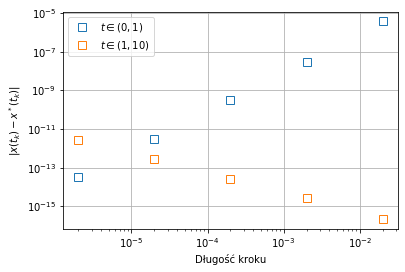

In [16]:
plt.show()

W różnych momentach rozwiązania wystarczy dużo dłuższy krok by uzyskać tą samą dokładność rozwiązania



## Jak zmieniać długość kroku
- Ewidentnie w różnych chwilach to samo równanie z tym samym krokiem będzie miało inny błąd rozwiązania.

- Aby decydować się o zmianie (wydłużeniu lub skróceniu) kroku musimy estymować ten błąd.

- Zasada postępowania jest analogiczna jak w całkowaniu adaptacyjnym wyliczamy rozwiązanie na dwa sposoby (metodami różnych rzędów) i z różnicy między nimi estymujemy błąd.



## Wbudowane metody Rungego-Kutty typu $p(\widehat{p})$

Mówimy o metodach wbudowanych gdy, dla tabeli 

$$
\begin{array}{c|c c c c c}
0 & & & & &\\
c_{2} & a_{21} & & & &\\
c_{3} & a_{31}&a_{32} & & &\\
\vdots& \vdots& \vdots& \ddots & &\\ 
c_{s} & a_{s1} & a_{s1} & \ldots & a_{s1} &\\ \hline
 & b_{1} & b_{2} & \ldots &b_{s-1} & b_{s}\\
 \hline
 & \widehat{b}_{1} & \widehat{b}_{2} & \ldots &\widehat{b}_{s-1} & \widehat{b}_{s}
\end{array}
$$

rozwiązanie $$x_1=x_0+h(b_1k_1+...+b_sk_s)$$
jest rzędu $p$, zaś
$$\widehat{x}_1=x_0+h(\widehat{b}_1k_1+...+\widehat{b}_sk_s)$$
jest rzędu $\widehat{p}$.

## Automatyczna kontrola długości kroku

- Należy określić wymagania - tolerancję względną i bezwzględną na każdą ze zmiennych równania - odpowiednio $Atol_i$ i $Rtol_i$. 
- Analizujemy różnicę między rozwiązaniami $x_1-\widehat{x}_1$

- Chcemy aby każda ze zmiennych spełniała
$$
|x_1^{(i)}-\widehat{x}_1^{(i)}|\leq sc_i,\quad sc_i=Atol_i+max(|x_0^{(i)}|,|x_1^{(i)}|)\cdot Rtol_i
$$

- Typową miarą błędu jest

$$
\mathrm{error}=\sqrt{\frac{1}{n}\sum^n_{i=1}\left(\cfrac{x_1^{(i)}-\widehat{x}_1^{(i)}}{sc_i}\right)^2}
$$

## Dobór kroku optymalnego
- Niech $q=\min(p,\widehat{p})$. Nasze rozwiązania są ze sobą zgodne do $q$-ego wyrazu szeregu Taylora, więc błąd 
$$
\mathrm{error}\approx C\cdot h^{q+1}
$$
- Ponieważ, $\mathrm{error}$ jest znormalizowany do naszych wymagań, to krok optymalny
$$C\cdot h_\mathrm{opt}^{q+1}\approx 1$$
- Daje to wzór na krok optymalny
$$
h_\mathrm{opt}=h\cdot(\mathrm{error})^{-\frac{1}{q+1}}
$$

## Zasada działania
- Wykonujemy krok i obliczamy $\mathrm{error}$, 
    - jeżeli jest on mniejszy od 1, to krok akceptujemy i stosujemy krok optymalny.
    - jeżeli jest większy od 1, to odrzucamy go, wyliczamy nowe rozwiązanie z nowo wyliczonym krokiem optymalnym i sprawdzamy dalej
- W praktyce dobór kroku optymalnego jest uzupełniony współczynnikami, które ograniczają nadmierny wzrost lub spadek kroku.
- Które rozwiązanie wybrać? Mamy dwa - rzędu $p$ i $\widehat{p}$. Zazwyczaj wybiera się rząd wyższy (tzw. lokalna ekstrapolacja) bo jest to lepsze przybliżenie rozwiązania (mimo tego, że estymata błędu jest niższego rzędu).

## Stały krok i obserwatory stanu
Uzupełnić na 2020/2021

## Praktyczne metody
- Na chwilę obecną metody bazujące na klasycznym RK4 to już historia. Możliwe jest dorobienie do nich estymatorów rzędu 3 ale nie jest to podejście popularne. 

- W obecnym rozwiązywaniu nieproblematycznych równań różniczkowych dominację mają schematy obliczeniowe opracowane przez Dormanda i Prince'a, a następnie modyfikowane przez Hairera i współpracowników. 

### Dormand-Prince rzędu 5(4)
- Najczęściej używana jest metoda Dormanda-Prince'a rzędu 5(4) - czasami zapisywana jako 4(5). Jest ona podstawową metodą w Matlabie (```ode45```) i Pythonie (method='RK45'). Siłą tej metody jest fakt, że została zoptymalizwana w celu poprawy efektywności lokalnej aproksymacji. Jest to metoda `pierwszego rzutu'

### Inne 
- Python oferuje nam oprócz tego metody 'DOP853' (od SciPy wersji 1.4.1), która jest metodą Dormanda-Prince'a rzędu 8 ze specjalnym dwuetapowym estymatorem błędu oraz metodę niskiego rzędu 'RK23' opracowaną przez Shampine'a (dostępna w Matlabie jako ```ode23```

## Przykład
Tzw Brusselator - równanie reakcji autokatalitycznej https://en.wikipedia.org/wiki/Brusselator

In [17]:
def brusselator(t,x):
    f1=1+x[0]**2*x[1]-4*x[0]
    f2=3*x[0]-x[0]**2*x[1]
    return [f1,f2]



In [18]:
from scipy.integrate import solve_ivp
x0=[1.5,3]
tspan=(0,20)
sol=solve_ivp(brusselator,tspan,x0)

In [19]:
plt.plot(sol.t,sol.y[0,:],sol.t,sol.y[1,:],marker='.')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.gca().legend(('$x^{(1)}$','$x^{(2)}$'),loc=7)
plt.grid()

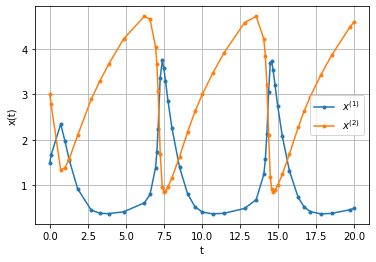

In [20]:
plt.show()

In [25]:
sol=solve_ivp(brusselator,tspan,x0,method='DOP853',rtol=1e-13,atol=1e-16)
reference=sol.y[:,-1]
sol.y.shape

(2, 346)

In [26]:
error853=[]
feval853=[]
error45=[]
feval45=[]
error23=[]
feval23=[]
for k in np.arange(-10, -2, .5):
    sol1=solve_ivp(brusselator,tspan,x0,method='DOP853',rtol=10**k,atol=10**k)
    sol2=solve_ivp(brusselator,tspan,x0,method='RK45',rtol=10**k,atol=10**k)
    sol3=solve_ivp(brusselator,tspan,x0,method='RK23',rtol=10**k,atol=10**k)
    error853.append(np.linalg.norm(sol1.y[:,-1]-reference))
    feval853.append(sol1.nfev)
    error45.append(np.linalg.norm(sol2.y[:,-1]-reference))
    feval45.append(sol2.nfev)
    error23.append(np.linalg.norm(sol3.y[:,-1]-reference))
    feval23.append(sol3.nfev)


In [23]:
plt.loglog(feval23,error23,feval45,error45,feval853,error853,
           marker='s',ms=8,fillstyle='none',
           linestyle='')
plt.xlabel('Liczba wywołań prawej strony')
plt.ylabel('$\|x(t_k)-x^*(t_k)\|$')
plt.gca().legend(('RK23','RK45','DOP853'),loc=0)
plt.grid()

### Porównanie trzech popularnych metod dla Brusselatora

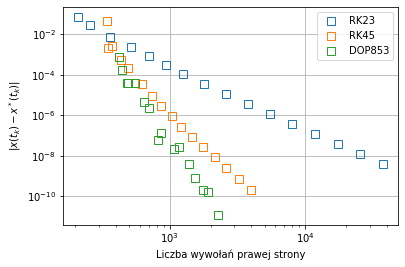

In [24]:
plt.show()

## Minusy rozwiązania zmiennokrokowego

Potencjalną wadą rozwiązania zmiennokrokowego jest to, że metoda robi kroki tam gdzie chce.



In [ ]:
sol=solve_ivp(brusselator,tspan,x0)

In [35]:
plt.plot(sol.t,sol.y[0,:],sol.t,sol.y[1,:],ls='none',marker='.')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.gca().legend(('$x^{(1)}$','$x^{(2)}$'),loc=0)
plt.gca().set(xlim=(0, 7.5))
plt.grid()

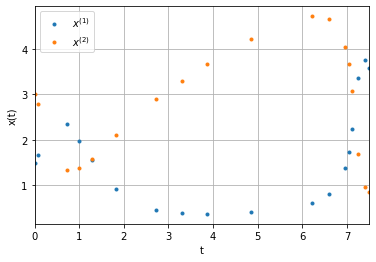

In [36]:
plt.show()

Sztucznie zagęszczając kroki tracimy przewagę wynikającą ze zmniejszenia czasu obliczeń.

## Gęste wyjście

Propozycją rozwiązania tego problemu jest tzw. gęste wyjście (*dense output*).

Idea polega na skonstruowaniu wielomianów interpolacyjnych, dla których błąd metody między krokami będzie tego samego rzędu co błąd metody (lub niewiele goszym).

Zazwyczaj interpoluje się wartości i pochodne w krańcach przedziału (warunki na 3 rząd) i uzupełnia dodatkowymi punktami z jego środka.

## Implementacja w Pythonie

In [ ]:
sol=solve_ivp(brusselator,tspan,x0,dense_output=True)
t=np.linspace(0,7.5,1000)
y=sol.sol(t)
plt.plot(t,y[0,:],t,y[1,:])

In [ ]:
plt.xlabel('t')
plt.ylabel('x(t)')
plt.gca().legend(('$x^{(1)}$','$x^{(2)}$'),loc=0)
plt.gca().set(xlim=(0, 7.5))
plt.grid()

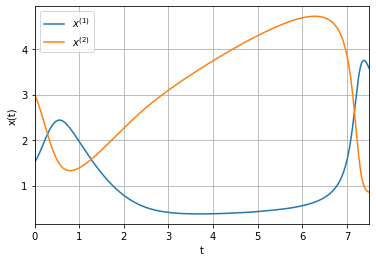

In [42]:
plt.show()

## Problemy sztywne
Zacznijmy od przykładu Robertsona opisującego równanie reakcji chemicznej:

In [53]:
def robertson(t,x):
    f1=-0.04*x[0]+10**4*x[1]*x[2]
    f2=0.04*x[0]-10**4*x[1]*x[2]-3*10**7*x[1]**2
    f3=3*10**7*x[1]**2
    return [f1,f2,f3]
x0=[1,0,0]

In [75]:
sol=solve_ivp(robertson,(0,0.3),x0,method='RK45')
print(sol.nfev)

1820


In [76]:
plt.plot(sol.t,sol.y[1,:],marker='.')
plt.xlabel('t')
plt.ylabel('$x^{2}(t)$')
plt.grid()

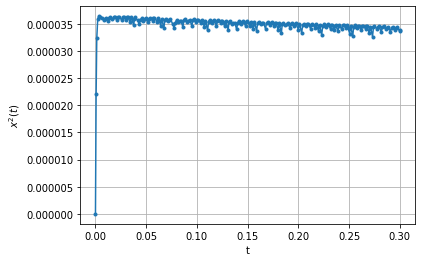

In [77]:
plt.show()

## Zwiększenie tolerancji

In [72]:
sol=solve_ivp(robertson,(0,0.3),x0,method='RK45',rtol=1e-12,atol=1e-12)
print(sol.nfev)

1496


In [73]:
plt.plot(sol.t,sol.y[1,:],marker='.')
plt.xlabel('t')
plt.ylabel('$x^{(2)}(t)$')
plt.grid()

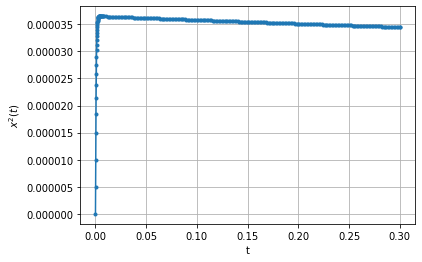

In [74]:
plt.show()

## Zastosowanie metody do równań sztywnych

In [85]:
sol=solve_ivp(robertson,(0,0.3),x0,method='Radau')
print(sol.nfev)

91


In [86]:
plt.plot(sol.t,sol.y[1,:],marker='.')
plt.xlabel('t')
plt.ylabel('$x^{(2)}(t)$')
plt.grid()

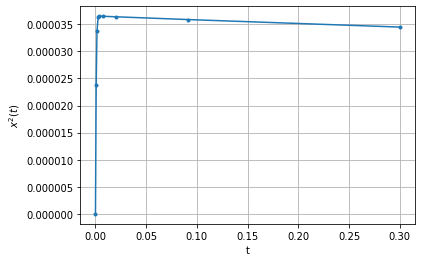

In [87]:
plt.show()

## Dlaczego to działa?
Weźmy proste równanie różniczkowe,
$$
\dot{x}=\lambda x
$$
Rozwiązania tego równania są stabilne dla $\mathrm{Re}\lambda<0$

Jego rozwiązanie metodą Eulera ma postać
$$
x_{k+1}=(1+h\lambda)x_k
$$
To rozwiązanie jest stabilne, jeżeli $|1+h\lambda|<1$ czyli dla $h\lambda$ leżących w kole jednostkowym na płaszczyźnie zespolonej o środku w punkcie $(-1,j0)$. 

## Stabilność metod odwrotnych
Metoda Eulera w tył (uwikłana) bazuje na analogicznej kwadraturze.

Dla niej rozwiązanie równania różniczkowego ma postać:
$$
x_{k+1}=x_k+hf(t_{k+1},x_{k+1})
$$
Co dla naszego równania ma postać

$$
x_{k+1}=\frac{1}{1-h\lambda}x_k
$$
Warunkiem stabilności jest więc $|1-h\lambda|>1$ czyli $h\lambda$ musi leżeć **na zewnątrz** koła jednostkowego o środku w $(1,j0)$, czyli automatycznie dla stabilnych równań ciągłych stabilność będzie zachowana.

## Odwrotne metody Rungego-Kutty
- Metody te, to metody w których macierze nie są już trójkątne dolne, i etapy mogą zależeć od siebie nawzajem.
- Charakteryzują się wysoką stabilnością.
- Wymagają rozwiązywania w każdej iteracji ukłądu równań nieliniowych - duży koszt numeryczny, dodatkowe źródła błędów.

## Skąd się bierze sztywność równań?
- Złe wyskalowanie.
- Układ zawiera składowe na różnych stałych czasowych.
- Osobliwości w równaniach lub układy bliskie osobliwym.

## Równania sztywne w Pythonie


```solve_ivp``` oferuje nam dwie metody:
- 'Radau' - opartą o zmodyfikowaną kwadraturę Gaussa - jest to metoda RK typu odwrotnego
- 'BDF' - metoda zupełnie innego typu wykorzystująca wariant algorytmu Geara, bazuje na różnicach wstecznych i zmienianiu rzędu metody od 1-5 (zaimplementowana w Matlabie jako ```ode15s```